## 1.解压数据集

In [1]:
!ls /home/aistudio/data

data294006


In [2]:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory '/home/aistudio/external-libraries': File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 3.1 MB/s eta 0:00:00a 0:00:01


In [3]:
%cd ~ 

/home/aistudio


In [4]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [5]:
%cd ~/PaddleOCR

/home/aistudio/PaddleOCR


## 2.安装环境

In [6]:
# 安装依赖库
!pip install -r requirements.txt -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple, https://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.0 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 12.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 13.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 7.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━

## 3.准备inference model和测试图像

In [21]:
!mkdir inference && cd inference
# 下载8.6M中文模型的检测模型并解压
# ! cd inference && wget https://paddleocr.bj.bcebos.com/ch_models/ch_det_mv3_db_infer.tar && tar xf ch_det_mv3_db_infer.tar
# # 下载8.6M中文模型的识别模型并解压
# ! cd inference && wget https://paddleocr.bj.bcebos.com/ch_models/ch_rec_mv3_crnn_infer.tar && tar xf ch_rec_mv3_crnn_infer.tar
!cd inference && wget https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/ch_PP-OCRv3_det_infer.tar && tar xf ch_PP-OCRv3_det_infer.tar
!cd inference && wget https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/ch_PP-OCRv3_rec_infer.tar && tar xf ch_PP-OCRv3_rec_infer.tar

mkdir: cannot create directory 'inference': File exists
--2024-09-11 14:43:46--  https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/ch_PP-OCRv3_det_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3829760 (3.7M) [application/x-tar]
Saving to: 'ch_PP-OCRv3_det_infer.tar.2'

ch_PP-OCRv3_det_inf 100%[===================>]   3.65M  19.6MB/s    in 0.2s    

2024-09-11 14:43:47 (19.6 MB/s) - 'ch_PP-OCRv3_det_infer.tar.2' saved [3829760/3829760]

--2024-09-11 14:43:47--  https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/ch_PP-OCRv3_rec_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443.

## 4.测试图像
准备了一些测试图像，上传图像测试我们的OCR模型。使用代码可视化测试图像

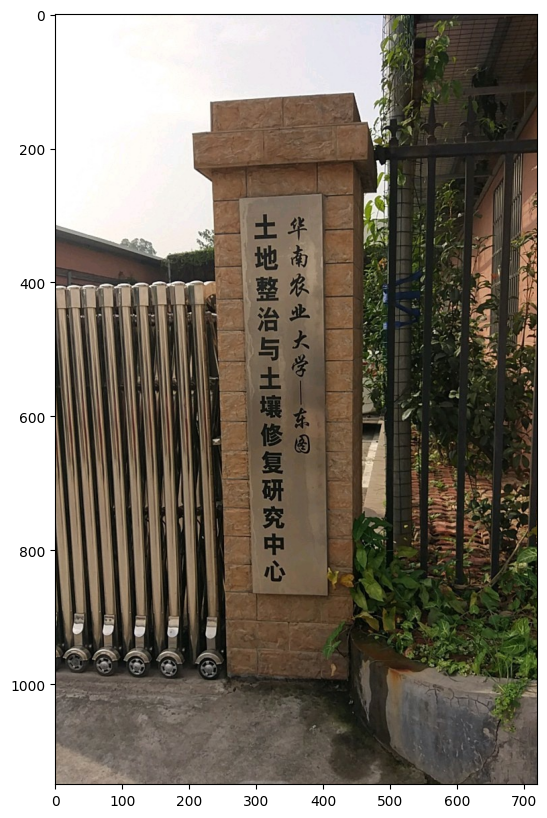

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

# 图像文件绝对路径
img_path = "/home/aistudio/data/data294006/ppocr_img/imgs/1.jpg"

# 打开图像文件
img = Image.open(img_path)

# 显示图像
plt.figure("test_img", figsize=(10,10))
plt.imshow(img)
plt.show()

### 4.1测试单张图像

下面开始调用tools/infer/predict_system.py 完成图像文本识别，共需要传入三个参数：

image_dir： 指定要测试的图像

det_model_dir： 指定轻量检测模型的inference model

rec_model_dir： 指定轻量识别模型的inference model

In [25]:

!pwd
!ls

/home/aistudio/PaddleOCR
LICENSE       applications  docs	       paddleocr.py	 setup.py
MANIFEST.in   benchmark     inference	       ppocr		 test_tipc
README.md     configs	    inference_results  ppstructure	 tests
README_en.md  deploy	    mkdocs.yml	       pyproject.toml	 tools
__init__.py   doc	    overrides	       requirements.txt  train.sh


In [27]:
# 快速运行
!python3 tools/infer/predict_system.py --image_dir="/home/aistudio/data/data294006/ppocr_img/imgs/1.jpg" --det_model_dir="./inference/ch_PP-OCRv3_det_infer/"  --rec_model_dir="./inference/ch_PP-OCRv3_rec_infer/"

[2024/09/11 14:46:43] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
E0911 14:46:43.197172 39283 analysis_config.cc:126] Please use PaddlePaddle with GPU version.
[2024/09/11 14:46:43] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
E0911 14:46:43.637300 39283 analysis_config.cc:126] Please use PaddlePaddle with GPU version.
[2024/09/11 14:46:43] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
[2024/09/11 14:46:44] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.4362211227416992
[2024/09/11 14:46:44] ppocr DEBUG: rec_res num  : 2, elapsed : 0.22074294090270996
[2024/09/11 14:46:44] ppocr DEBUG: 0  Predict time of /home/aistudio/data/data294006/ppocr_img/imgs/1.jpg: 0.662s
[2024/09/11 14:46:44] ppocr DEBUG: 土地整治与土壤修复研究中心, 0.889
[2024/09/11 14:46:44] ppocr DEBUG: 华南农业大学一东图, 0.918
[2024/09/11 14:46:44] ppocr

输出结果中有两列数据，第一列表示PaddleOCR识别出的文字，第二列表示识别出当前文字的置信度。置信度的数据范围是[0-1]，置信度越接近1表示文本识别对的“信心”越大。

如下输出结果中：

片烟产品合格证, 0.929

品种, 0.959

同时，识别结果会可视化在图像中并保存在./inference_results文件夹下，可以通过左边的目录结构选择要打开的文件， 也可以通过如下代码将可视化后的图像显示出来，观察OCR文本识别的效果。

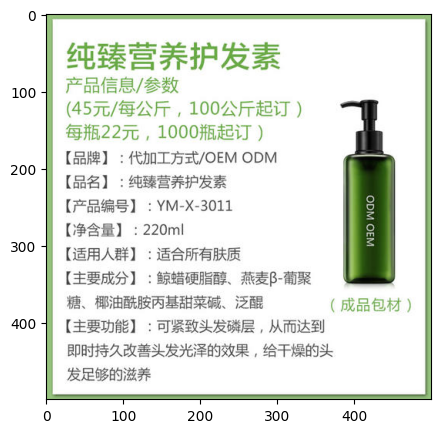

In [11]:
## 显示轻量级模型识别结果
img_path= "/home/aistudio/data/data294006/ppocr_img/imgs/11.jpg"
img = Image.open(img_path)
plt.figure("results_img", figsize=(5,5))
plt.imshow(img)
plt.show()

## 4.2测试多张图像

image_dir支持传入单张图像和图像所在的文件目录，当image_dir指定的是图像目录时，运行上述指令会预测当前文件夹下的所有图像中的文字，并将预测的可视化结果保存在inference_results文件夹下。

In [12]:
# 快速运行
!python3 tools/infer/predict_system.py --image_dir="/home/aistudio/data/data294006/ppocr_img/imgs/" --det_model_dir="./inference/ch_PP-OCRv3_det_infer/"  --rec_model_dir="./inference/ch_PP-OCRv3_rec_infer/"

[2024/09/11 14:28:18] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
E0911 14:28:18.160805  7505 analysis_config.cc:126] Please use PaddlePaddle with GPU version.
[2024/09/11 14:28:18] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
E0911 14:28:18.594830  7505 analysis_config.cc:126] Please use PaddlePaddle with GPU version.
[2024/09/11 14:28:18] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
[2024/09/11 14:28:19] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.42563867568969727
[2024/09/11 14:28:20] ppocr DEBUG: rec_res num  : 35, elapsed : 1.5800855159759521
[2024/09/11 14:28:20] ppocr DEBUG: 0  Predict time of /home/aistudio/data/data294006/ppocr_img/imgs/00006737.jpg: 2.042s
[2024/09/11 14:28:20] ppocr DEBUG: r88.997788.co11, 0.517
[2024/09/11 14:28:20] ppocr DEBUG: 登机牌, 0.987
[2024/09/11 14:28:20] 

## 4.3图像文本识别可视化

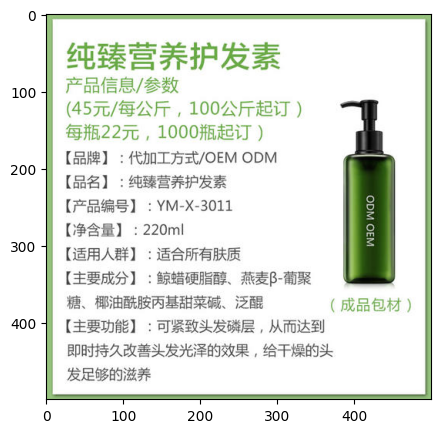

In [14]:
## 显示轻量级模型识别结果
## 可视化的文本识别效果
img_path= "/home/aistudio/data/data294006/ppocr_img/imgs/11.jpg"
img = Image.open(img_path)
plt.figure("results_img", figsize=(5,5))
plt.imshow(img)
plt.show()

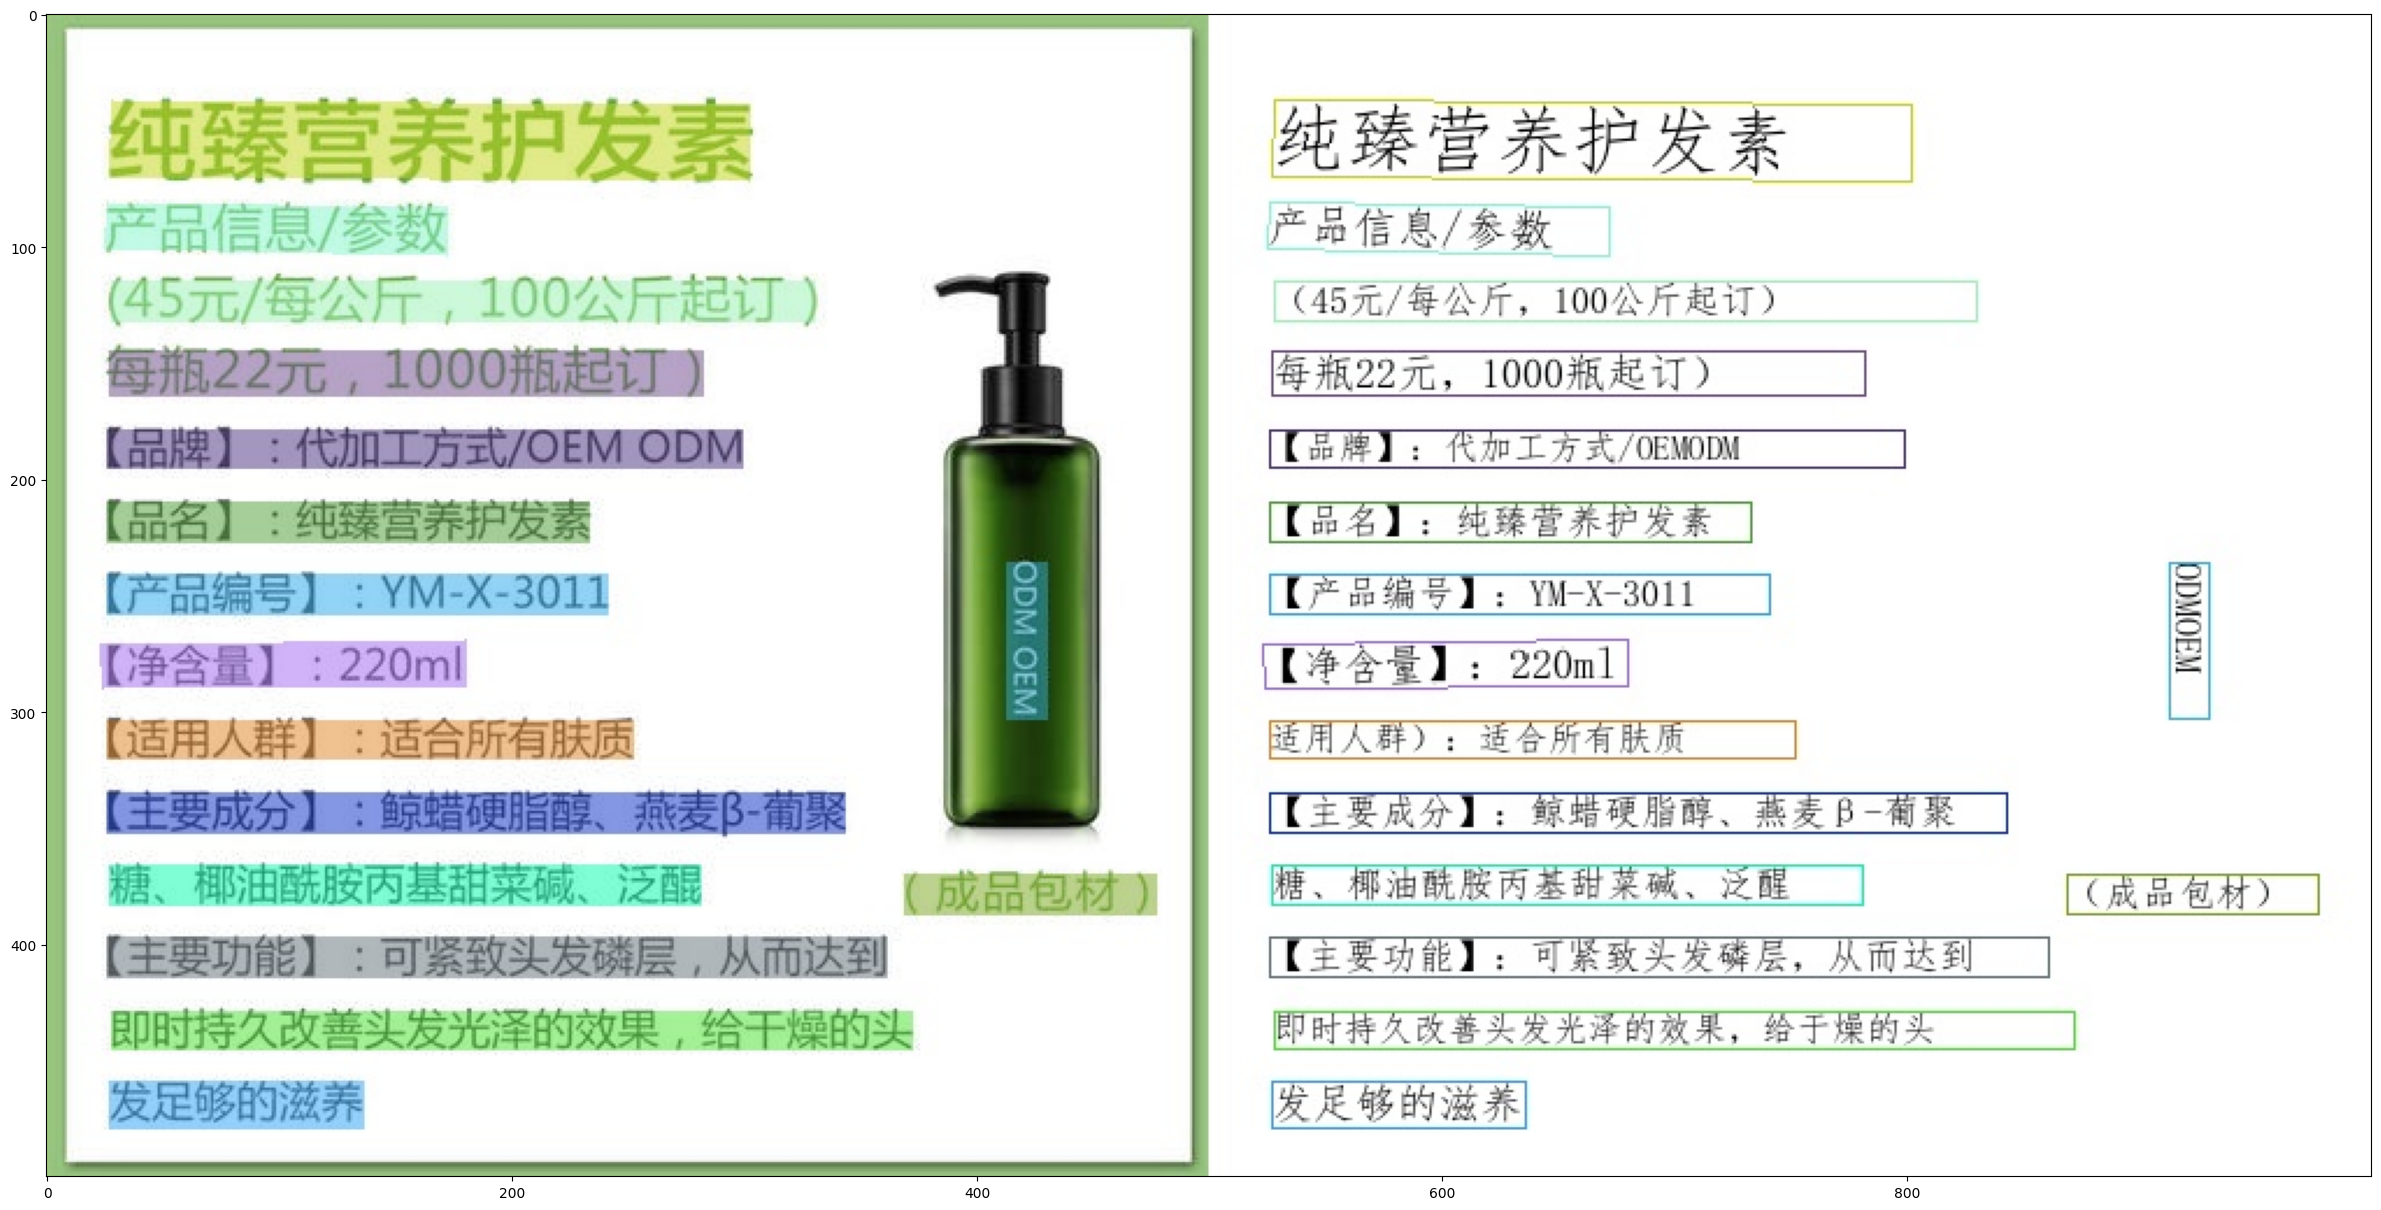

In [13]:
## 显示轻量级模型识别结果
img_path= "./inference_results/11.jpg"
img = Image.open(img_path)
plt.figure("results_img", figsize=(30,30))
plt.imshow(img)
plt.show()